<a href="https://colab.research.google.com/github/rosalieCRX/UnemploytmentRatePython/blob/main/formatData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas

>>> process series: 

UNRATENSA series processded
ICSA series processded
TB3MS series processded
GS5 series processded
GS10 series processded
GS1 series processded
BAA series processded
AAA series processded
FEDFUNDS series processded
USALOLITONOSTSAM series processded
HOUST series processded

>>> view series: 
             Unemployment Rate  Initial Claims  ...        CLI  Housing Starts
Date                                           ...                           
1919-01-31                NaN             NaN  ...        NaN             NaN
1919-02-28                NaN             NaN  ...        NaN             NaN
1919-03-31                NaN             NaN  ...        NaN             NaN
1919-04-30                NaN             NaN  ...        NaN             NaN
1919-05-31                NaN             NaN  ...        NaN             NaN
...                       ...             ...  ...        ...             ...
2020-08-31                8.5           884.0  ...  98.550400 

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


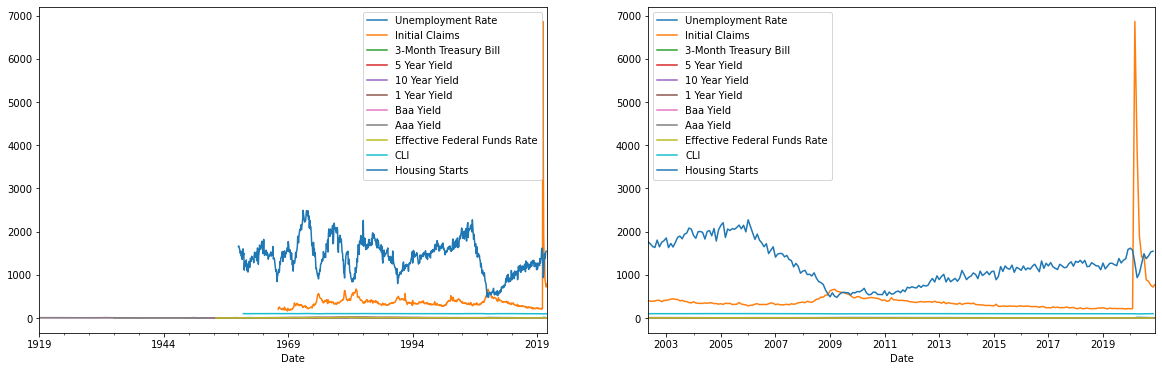

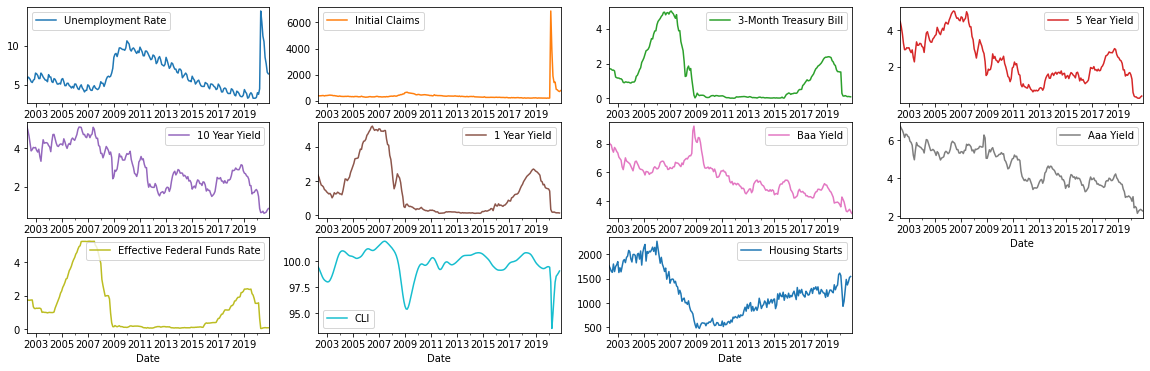

In [ ]:
import pandas
from pandas import read_csv
from pandas.plotting import scatter_matrix
from pandas import DataFrame
import numpy as np


#### get all raw data
base_url = r'https://fred.stlouisfed.org/graph/fredgraph.csv?id={code}'

codes = ['UNRATENSA','ICSA','TB3MS','GS5','GS10','GS1','BAA','AAA','FEDFUNDS','USALOLITONOSTSAM','HOUST'] 
names = ['Unemployment Rate','Initial Claims','3-Month Treasury Bill','5 Year Yield','10 Year Yield','1 Year Yield','Baa Yield','Aaa Yield','Effective Federal Funds Rate','CLI','Housing Starts']
# all monthly, except ICSA (weekly)

raw_data = []
print(">>> process series: \n")
for code in codes:
  print("%s series processded"%code)
  url = base_url.format(code=code) 
  raw_data.append(read_csv(url))
time_series = {}
for name,code, d in zip(names,codes,raw_data):
  d.index = d.DATE 
  time_series[name] = d[code]

df = DataFrame(time_series)
df['Initial Claims'] = df['Initial Claims'].div(1000)  # change unit: thousands
df.index.name = 'Date'
df.index = pandas.DatetimeIndex(df.index)
df = df.resample('M').last()  # sample IC data based on the last value in a month
print("\n>>> view series: \n %s"%df)

%run "/content/drive/MyDrive/Colab Notebooks/unemployment rate/plot all series.ipynb"